In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
data_india = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/sentiments_india.csv")
data_africa = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/sentiments_africa.csv")
data_usa = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/sentiments_usa.csv")
data_eu = pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/sentiments_eu.csv")

In [122]:
data_usa.head()

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,means moresevere floods hurricanes damage park...,usa,2022,August,"['means', 'moresevere', 'floods', 'hurricanes'...",0.323,0.677,0.000,-0.8225,negative
1,gadol much lttgtlt,usa,2022,August,"['gadol', 'much', 'lttgtlt']",0.000,1.000,0.000,0.0000,neutral
2,marshes ponds meadows soak water rains help ke...,usa,2022,August,"['marshes', 'ponds', 'meadows', 'soak', 'water...",0.118,0.694,0.188,0.2500,neutral
3,parkland helps protect millions americans effe...,usa,2022,August,"['parkland', 'helps', 'protect', 'millions', '...",0.159,0.612,0.229,0.3182,positive
4,cooling whats going kill grandmother everyone ...,usa,2022,August,"['cooling', 'whats', 'going', 'kill', 'grandmo...",0.220,0.559,0.220,0.0000,neutral


In [123]:
# no. of tweets per country per year
# Trend of tweets over the years          # line chart with all countries
d_usa = data_usa.groupby("year").agg({'content':'count'}).reset_index().sort_values('year', ascending = True)
d_india = data_india.groupby("year").agg({'content':'count'}).reset_index().sort_values('year', ascending = True)
d_africa = data_africa.groupby("year").agg({'content':'count'}).reset_index().sort_values('year', ascending = True)
d_eu = data_eu.groupby("year").agg({'content':'count'}).reset_index().sort_values('year', ascending = True)

In [124]:
d_africa

,year,content
0,2018,239
1,2019,416
2,2020,318
3,2021,290
4,2022,609


In [125]:
data_usa.rename(columns = {'content':'content_usa'}, inplace = True)
data_india.rename(columns = {'content':'content_india'}, inplace = True)
data_eu.rename(columns = {'content':'content_eu'}, inplace = True)
data_africa.rename(columns = {'content':'content_africa'}, inplace = True)



In [163]:
d_usa_s = data_usa.groupby(["year", "comp_score"]).agg({'content_usa':'count'}).sort_values('year', ascending = True)
d_india_s = data_india.groupby(["year", "comp_score"]).agg({'content_india':'count'}).sort_values('year', ascending = True)
d_africa_s = data_africa.groupby(["year", "comp_score"]).agg({'content_africa':'count'}).sort_values('year', ascending = True)
d_eu_s = data_eu.groupby(["year", "comp_score"]).agg({'content_eu':'count'}).sort_values('year', ascending = True)

In [164]:
combine = pd.merge(d_usa_s, d_india_s, on=['year',"comp_score"]).merge(d_eu_s , on=['year',"comp_score"]).merge(d_africa_s, on = ['year',"comp_score"], how = "left")    

In [165]:
combine.reset_index().head()

,year,comp_score,content_usa,content_india,content_eu,content_africa
0,2010,negative,138,4,58,NaN
1,2010,neutral,319,6,118,NaN
2,2010,positive,139,2,67,NaN
3,2011,negative,424,30,226,NaN
4,2011,neutral,1118,137,554,NaN


In [166]:
combine["total_usa"] = combine['content_usa'] / combine.groupby(['comp_score','content_usa'])['content_usa'].transform('sum')

In [167]:
combine


content_usa  content_india  content_eu  content_africa  \
year comp_score                                                           
2010 negative            138              4          58             NaN   
     neutral             319              6         118             NaN   
     positive            139              2          67             NaN   
2011 negative            424             30         226             NaN   
     neutral            1118            137         554             NaN   
     positive            414             56         337             NaN   
2012 negative            562             77         349             NaN   
     neutral            1432            218         901             NaN   
     positive            725             98         429             NaN   
2013 positive            838            135         506             NaN   
     negative            873            100         523             NaN   
     neutral            1819            313        1230             NaN   
2014 negative           1699            164         611             NaN   
     neutral            3483            508        1512             NaN   
     positive           1505            209         665             NaN   
2015 positive           1622            511         854             NaN   
     negative           2280            319         830             NaN   
     neutral            4368            928        2012             NaN   
2016 positive           2006            416         829             NaN   
     neutral            5020            821        2019             NaN   
     negative           2608            312         869             NaN   
2017 negative           2861            271        1018             NaN   
     neutral            5872            729        2102             NaN   
     positive           2556            509         934             NaN   
2018 negative           2784            414        1326            53.0   
     neutral            4518            707        2441           114.0   
     positive           2521            673        1381            72.0   
2019 neutral            5052           1224        3104           217.0   
     positive           2957            967        2084           104.0   
     negative           3356            553        1784            95.0   
2020 negative           1501            310         795            74.0   
     neutral            2229            597        1340           153.0   
     positive           1363            517         979            91.0   
2021 negative           1164            324        1169            76.0   
     neutral            1954            653        2204           129.0   
     positive           1124            532        1198            85.0   
2022 neutral            2536           1221        2173           278.0   
     negative           1748            685        1482           155.0   
     positive           1471            839        1369           176.0   

                 total_usa  
year comp_score             
2010 negative          1.0  
     neutral           1.0  
     positive          1.0  
2011 negative          1.0  
     neutral           1.0  
     positive          1.0  
2012 negative          1.0  
     neutral           1.0  
     positive          1.0  
2013 positive          1.0  
     negative          1.0  
     neutral           1.0  
2014 negative          1.0  
     neutral           1.0  
     positive          1.0  
2015 positive          1.0  
     negative          1.0  
     neutral           1.0  
2016 positive          1.0  
     neutral           1.0  
     negative          1.0  
2017 negative          1.0  
     neutral           1.0  
     positive          1.0  
2018 negative          1.0  
     neutral           1.0  
     positive          1.0  
2019 neutral           1.0  
     positive          1.0  
     negative          1.0  
2020 negative

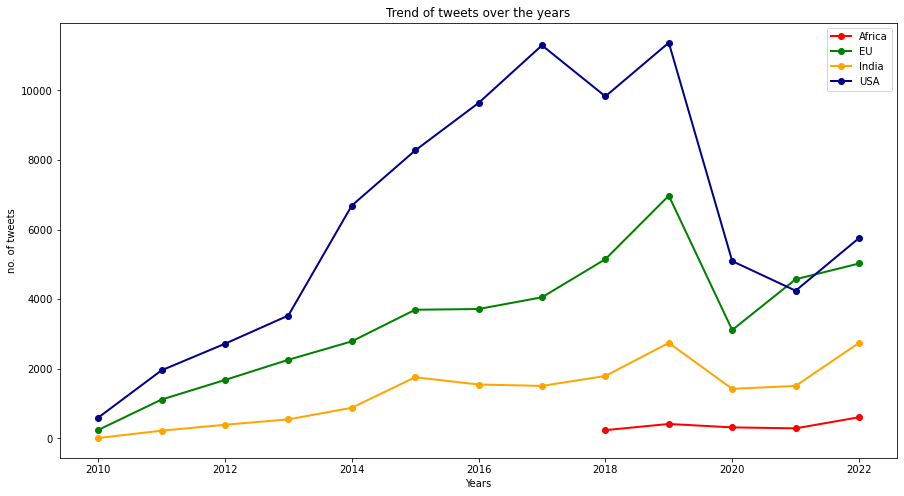

In [178]:
plt.figure(figsize=(15,8))

# multiple line plots
plt.plot( 'year', 'content', data=d_africa, marker='o', color='red', linewidth=2, label="Africa")
plt.plot( 'year', 'content', data=d_eu, marker='o', color='green', linewidth=2, label="EU")
plt.plot( 'year', 'content', data=d_india, marker='o', color='orange', linewidth=2, label="India")
plt.plot( 'year', 'content', data=d_usa, marker='o', color='darkblue', linewidth=2, label="USA")

# show legend
plt.legend()
plt.xlabel("Years")
plt.ylabel("no. of tweets")
plt.title("Trend of tweets over the years")

# show graph
plt.show()

AttributeError: 'Rectangle' object has no property 'hue'

<Figure size 720x720 with 0 Axes>

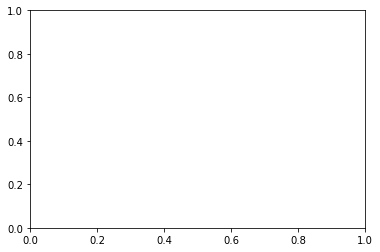

In [170]:
plt.figure(figsize=(10,10))
width = 0.4
fig, ax = plt.subplots()
ax.bar(x=combine['year'], height=combine['content_africa'], width=width)
ax.bar(x=combine['year']+width, height=combine['content_india'], width=width)


#combine.plot(x="year", y=['content_africa', 'content_india', 'content_eu', 'content_usa'], kind="bar", width = 0.35)